# Gonzalo de las Heras de Matías. July 2020.
### Universidad Europea de Madrid. Business & Tech School. IBM Master's Degree in Big Data Analytics.
#### Master's thesis:
### ADVANCED DRIVER ASSISTANCE SYSTEM (ADAS) BASED ON AUTOMATIC LEARNING TECHNIQUES FOR THE DETECTION AND TRANSCRIPTION OF VARIABLE MESSAGE SIGNS.

![title](notebook_data/imgs/uem_ibm.png)

### Imports

In [2]:
from utils_vms import configuration as conf
from utils_vms import visualization
from utils_vms import functions
import pandas as pd
import time

%matplotlib inline
%config InlineBackend.figure_format='retina'

### Dataset

In [2]:
df = pd.read_csv(conf.PATH_DATASET + 'train.csv')
df["image_name"] = conf.PATH_DATASET + "images/03_train/imgs/" + df["image_name"]
df.loc[df['x_min'] == -1, "x_min"] = ''
df.loc[df['x_max'] == -1, "x_max"] = ''
df.loc[df['y_min'] == -1, "y_min"] = ''
df.loc[df['y_max'] == -1, "y_max"] = ''
df.loc[df['class_name'] == '-', "class_name"] = ''
df.tail()

image_name x_min y_min x_max y_max  \
701  ../dataset/images/03_train/imgs/00350_B.jpg                           
702    ../dataset/images/03_train/imgs/00351.jpg                           
703  ../dataset/images/03_train/imgs/00351_B.jpg                           
704    ../dataset/images/03_train/imgs/00352.jpg                           
705  ../dataset/images/03_train/imgs/00352_B.jpg                           

    class_name  
701             
702             
703             
704             
705

### Some examples

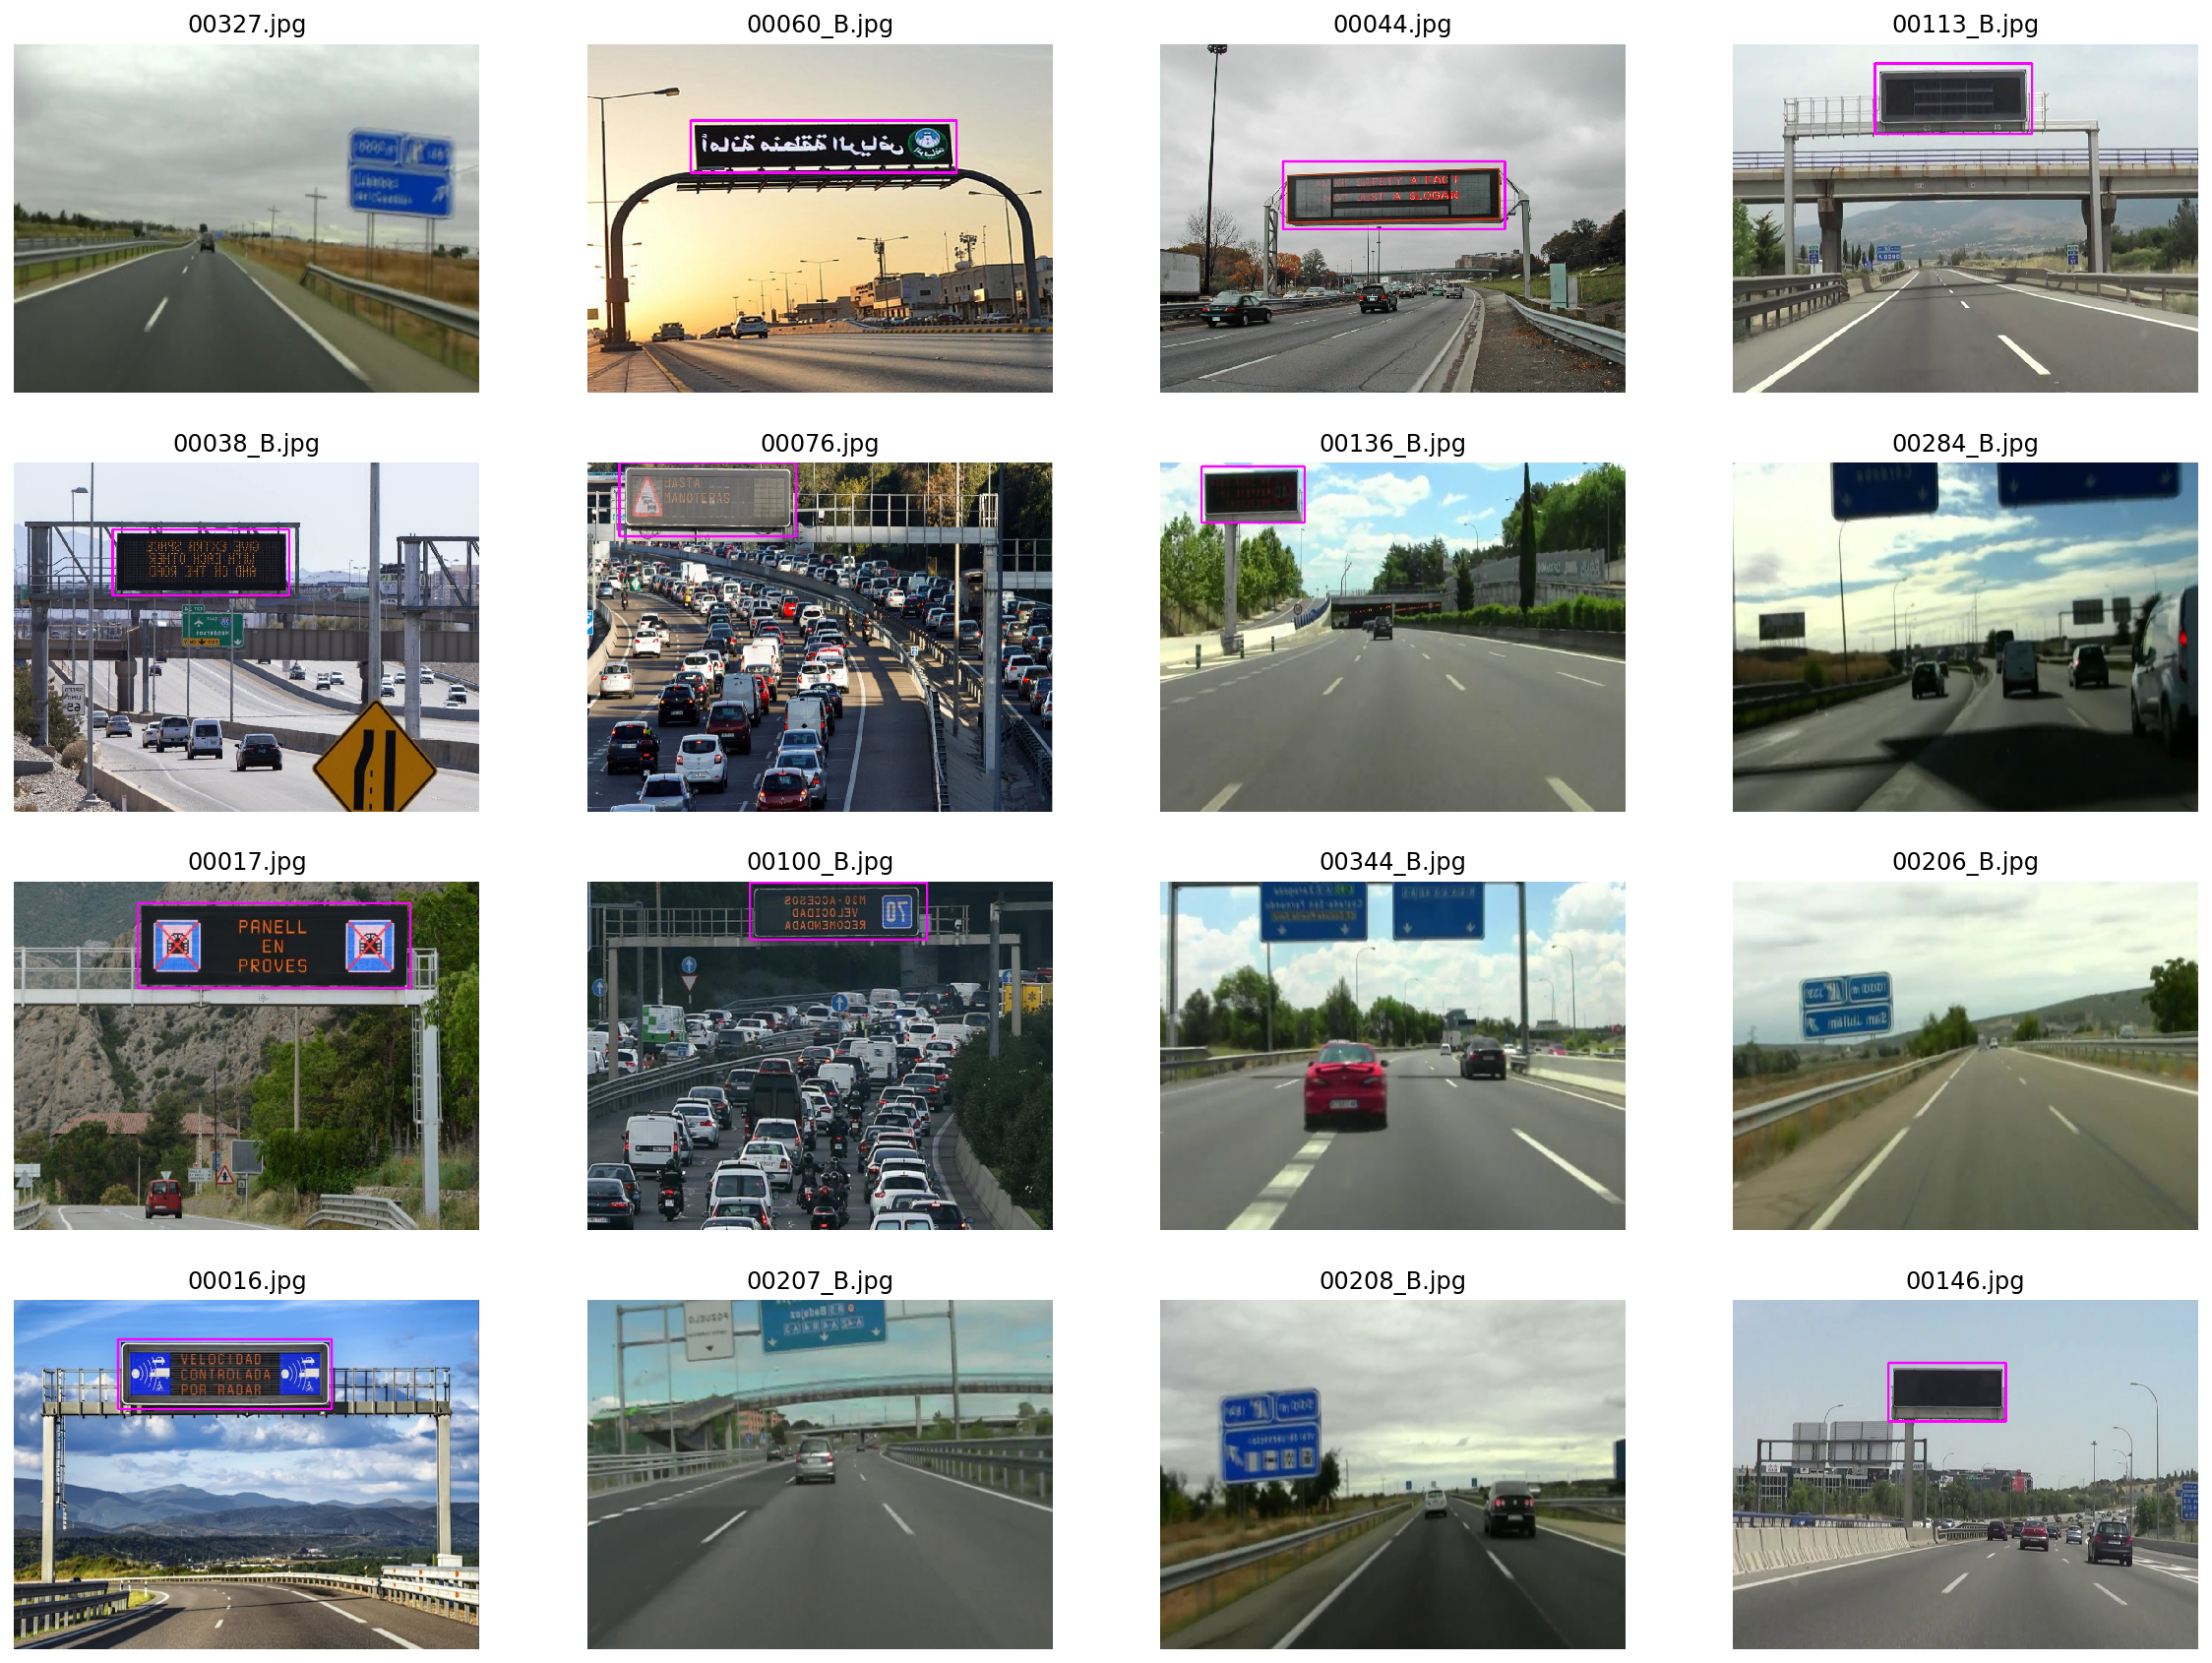

In [3]:
visualization.show_examples(df, 16)

### Pretrained models

In [4]:
functions.download_pretrained_models()

Pretrained pretrained_resnet50.h5 already exists
Pretrained pretrained_resnet101.h5 already exists
Pretrained pretrained_resnet152.h5 already exists


### Train and test split

In [5]:
# Train annotations.
df.to_csv(conf.FILE_TRAIN_ANNOTATIONS, index=False, header=None)

# Classes file.
with open(conf.FILE_CLASSES, 'w') as f:
    f.write('VMS,0')

print("Annotations_train:\n------------------\n")
!head annotations_train.csv

print("\nAnnotations_validation:\n-----------------------\n")
!head annotations_validation.csv

print("\nClasses:\n--------\n")
!head classes.csv

Annotations_train:
------------------

../dataset/images/03_train/imgs/00000.jpg,318,236,748,420,VMS
../dataset/images/03_train/imgs/00000_B.jpg,276,236,706,420,VMS
../dataset/images/03_train/imgs/00001.jpg,480,199,885,334,VMS
../dataset/images/03_train/imgs/00001_B.jpg,139,199,544,334,VMS
../dataset/images/03_train/imgs/00002.jpg,281,4,792,183,VMS
../dataset/images/03_train/imgs/00002_B.jpg,231,4,742,183,VMS
../dataset/images/03_train/imgs/00003.jpg,253,169,850,386,VMS
../dataset/images/03_train/imgs/00003_B.jpg,173,169,771,386,VMS
../dataset/images/03_train/imgs/00004.jpg,336,270,775,449,VMS
../dataset/images/03_train/imgs/00004_B.jpg,249,270,687,449,VMS

Annotations_validation:
-----------------------

../dataset/images/03_train/imgs/00239.jpg,,,,,
../dataset/images/03_train/imgs/00040_B.jpg,291,180,742,319,VMS
../dataset/images/03_train/imgs/00038_B.jpg,217,147,605,292,VMS
../dataset/images/03_train/imgs/00104.jpg,411,0,678,100,VMS
../dataset/images/03_train/imgs/00159_B.jpg,89,1,4

In [6]:
len(df)

706

### Training

In [7]:
train = True

if train:
    
    start_time = time.time()

    !keras_retinanet/bin/train.py \
        --weights { conf.PATH_SNAPSHOTS_PRETRAINED + "/" + conf.PRETRAINED_RESNET50["snapshot_name"] } \
        --steps 500 \
        --batch-size 8 \
        --lr 1e-5 \
        --freeze-backbone \
        --snapshot-path "PATH" \
        --epochs 50 csv annotations_train.csv classes.csv \
        --val-annotations annotations_test.csv
        
    print("--- TRAIN TIME: %s s. ---" % (time.time() - start_time))

Using TensorFlow backend.
2020-07-11 22:29:14.160183: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory
2020-07-11 22:29:14.160222: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory
2020-07-11 22:29:14.160229: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Creating model, this may take a second...
2020-07-11 22:29:14.714980: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-11 22:29:14.733121: I tensorflow/stream_executor/cuda/cuda_gpu_e

![title](notebook_data/imgs/ty.jpg)